## Introduction
The price of an Airline Ticket is affected by a number of factors, such as flight duration,
days left for departure, arrival time and departure time etc. Airline organizations may
diminish the cost at the time they need to build the market and at the time when the
tickets are less accessible. They may maximize the costs. The price may rely upon
different factors. Each factor has its own proprietary rules and algorithms to set the price
accordingly.

## Importing Libraries

In [623]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing dataset


In [624]:
df=pd.read_excel("Flight_Fare.xlsx")

In [625]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [626]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [627]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

##### Check whether any null values are there or not

In [628]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [616]:
### getting all the rows where we have missing value
df[df['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [617]:
#As there is only 1 missing value , I can directly drop that
df.dropna(inplace=True)


In [618]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [619]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Univariate Analysis


In [630]:
import sweetviz as sv
univariate_report = sv.analyze(df)
univariate_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate Analysis


# Airline vs Price Analysis


#####  *From graph we can see that Jet Airways Business have the highest Price.
#####  *Apart from the first Airline almost all are having similar median

##### * So we will analize Airline vs Price

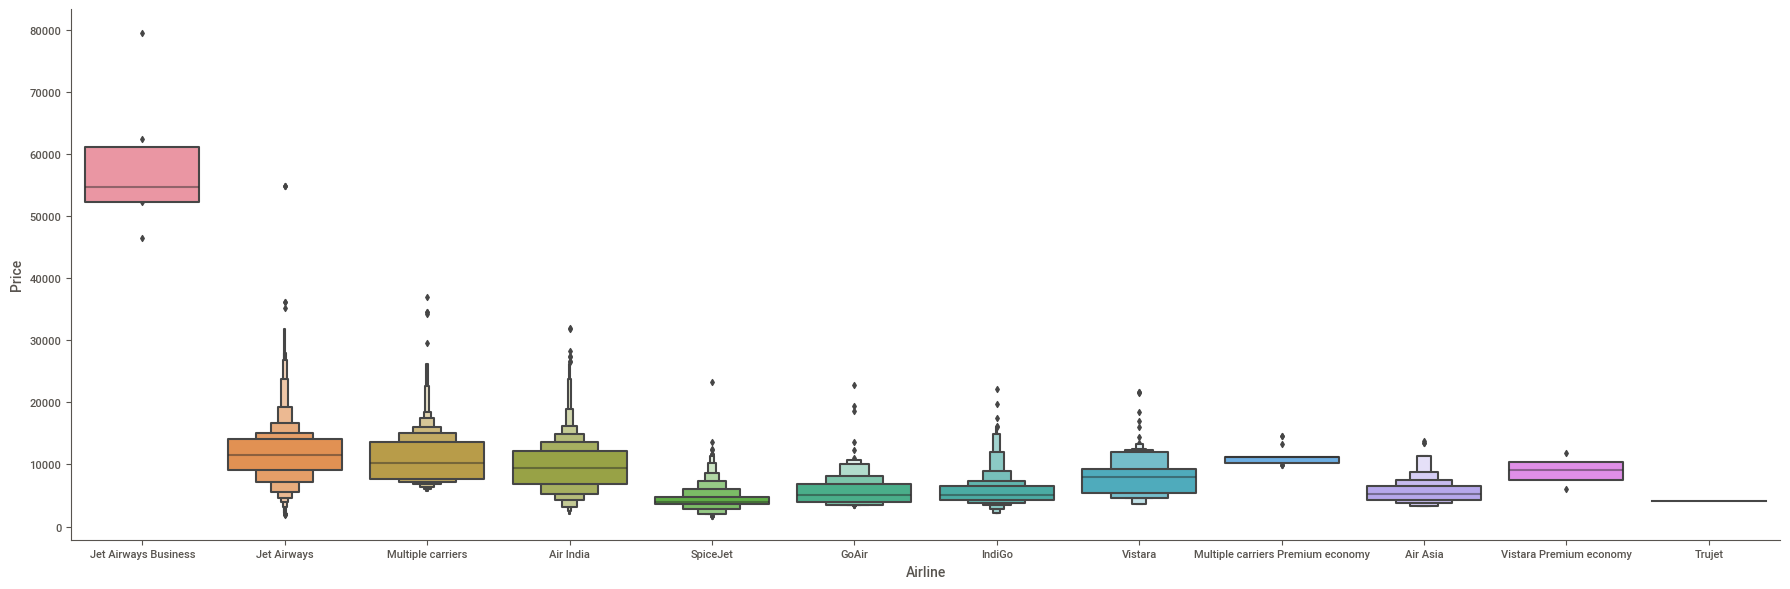

In [639]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##### 1.From graph we can see that Bangalore Source have the highest Price.
##### Source vs Price

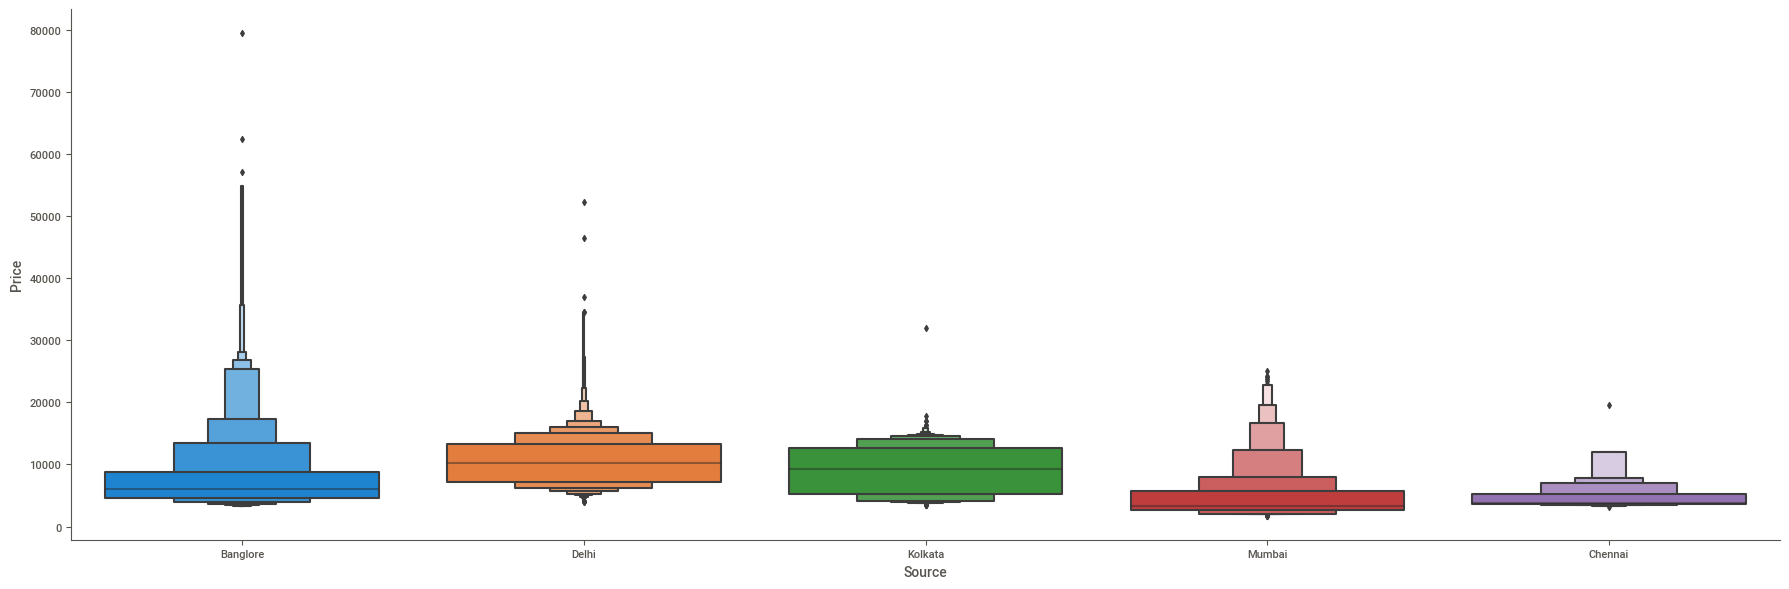

In [643]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##### 2.From graph we can see that New Delhi Destination have the highest Price.
##### Destination vs Price

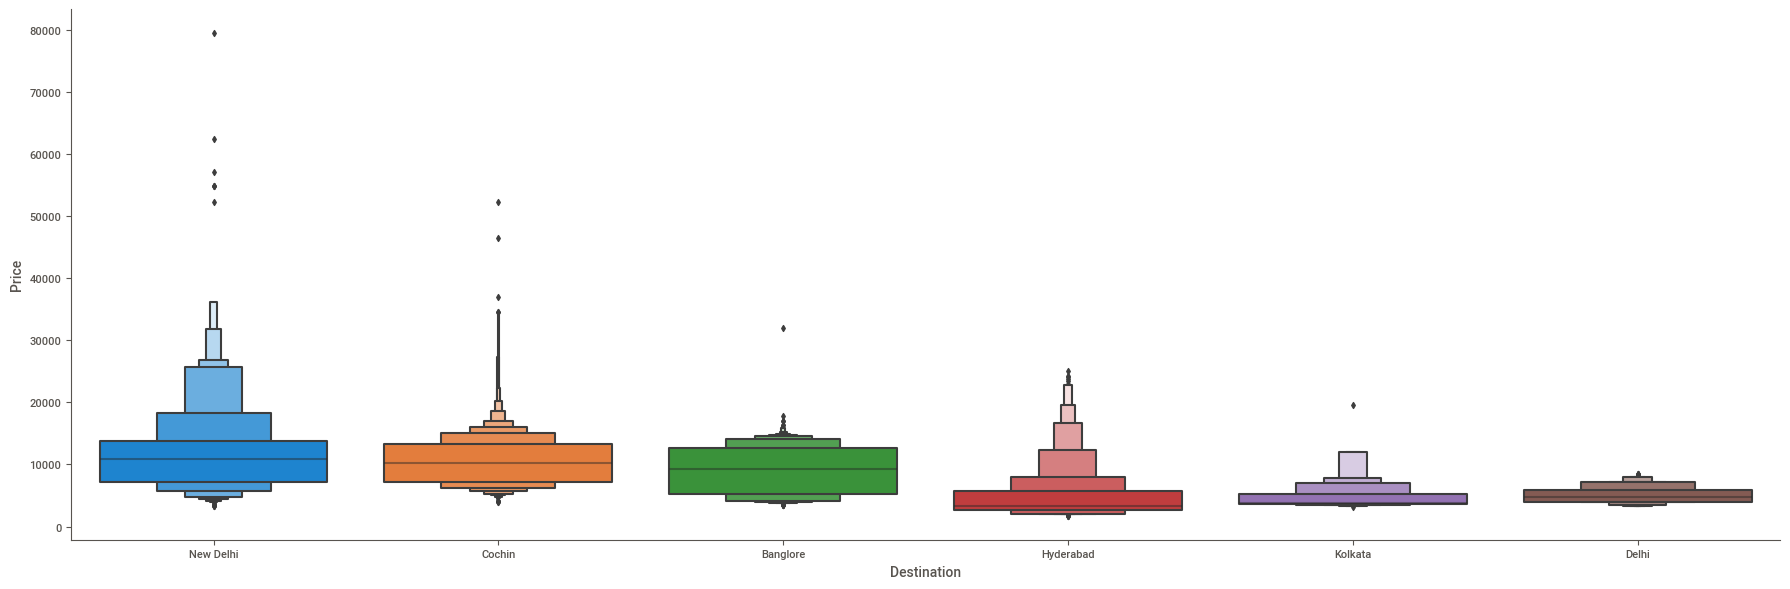

In [644]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##### 3.From graph we can see that 1st Stops have the highest Price.
##### Total_stops vs Price

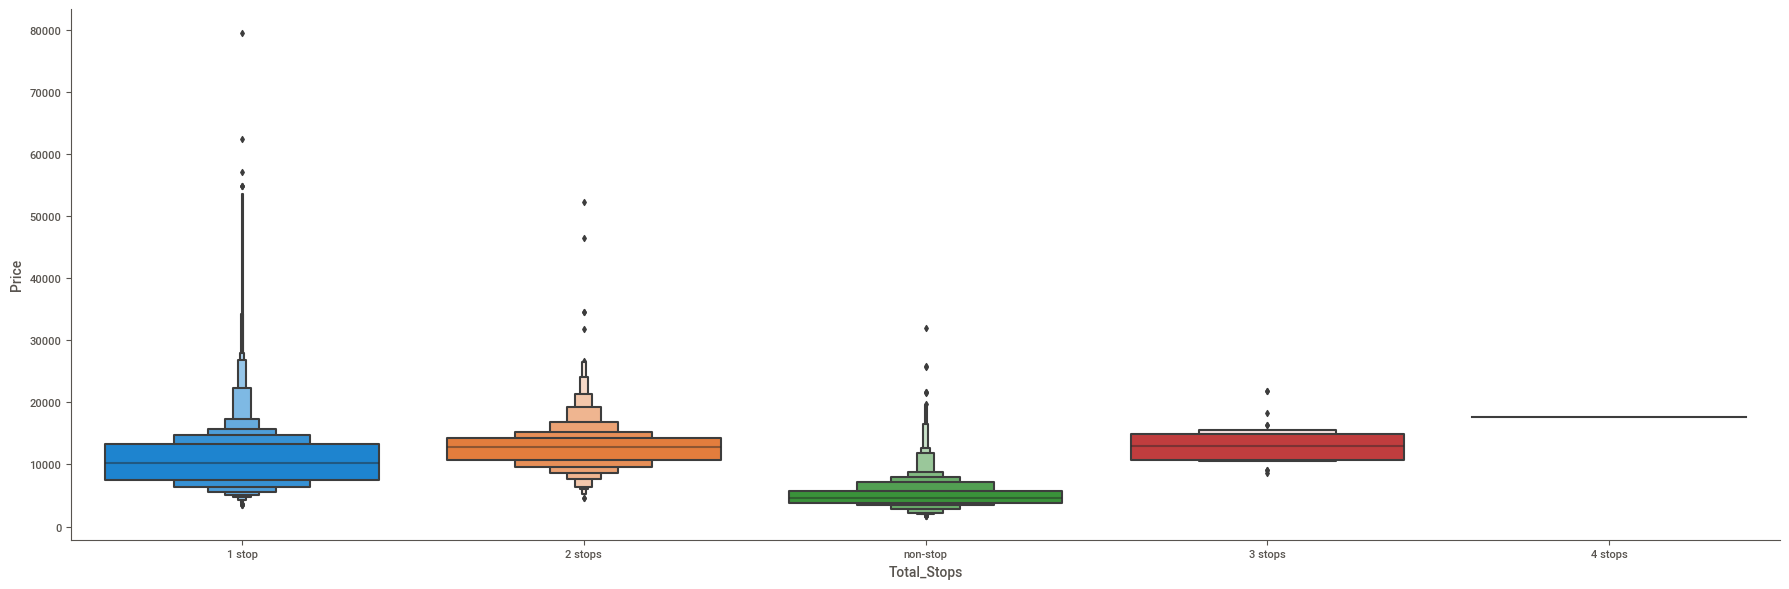

In [648]:

sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# EDA
*From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

*For this we require pandas to_datetime to convert object data type to datetime dtype.

*dt.day method will extract only day of that date

*dt.month method will extract only month of that day

### Feature Engineering

#### 1."Journey_day" to fetch 'day' and 'month'

In [631]:
import datetime as dt

In [632]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey)

In [633]:
df["Journey_day"]

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Journey_day, Length: 10683, dtype: datetime64[ns]

In [634]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y")
df["Journey_day"]

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Journey_day, Length: 10683, dtype: datetime64[ns]

In [649]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day


In [656]:
df["Journey_day"].value_counts()

9     1406
6     1288
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Journey_day, dtype: int64

In [636]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [547]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [548]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


#### 2.cleaning of Dep_Time & Arrival_Time

In [549]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [550]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [551]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)


In [552]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [553]:
df["Duration_hours"]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: int64

In [554]:
df.drop(["Duration"], axis = 1, inplace = True)


In [555]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


### Airline vs Price Analysis

In [556]:
#Handling Categorical Data
#One can find many ways to handle categorical data. Some of them categorical data are,

#Nominal data --> data are not in any order --> OneHotEncoder is used in this case
#Ordinal data --> data are in order --> LabelEncoder is used in this case

In [557]:
df["Airline"].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

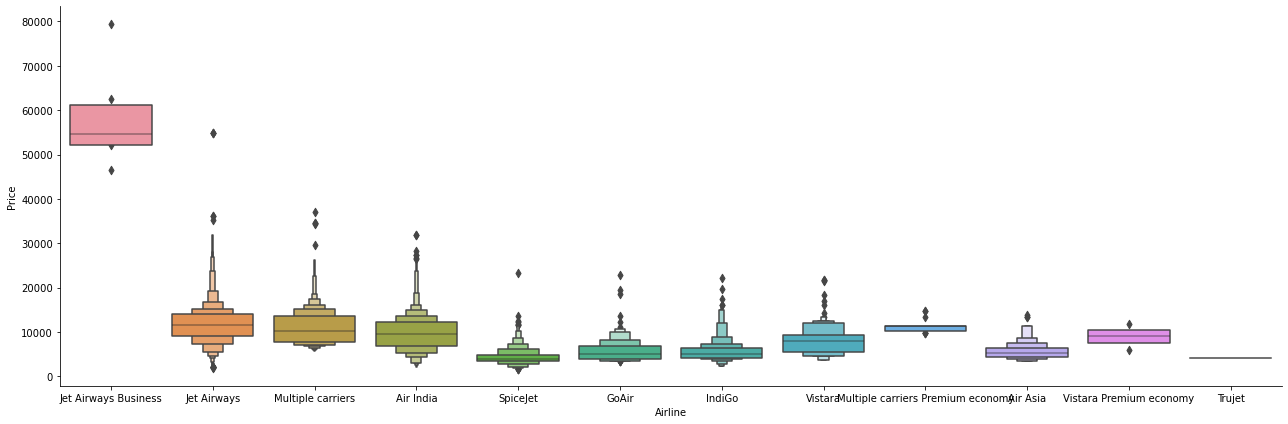

In [558]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [559]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [560]:
df["Source"].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

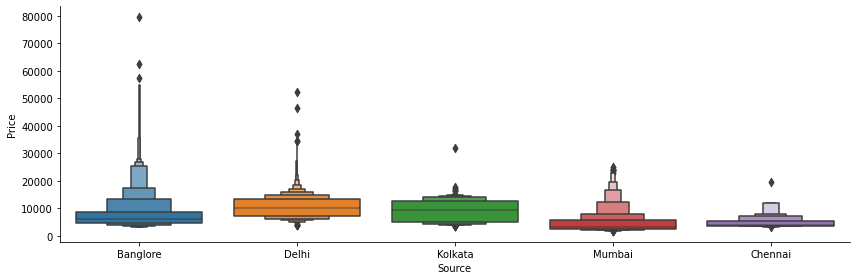

In [561]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [562]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [563]:
df["Destination"].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [564]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [565]:
df["Route"]


0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [566]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [567]:
df["Total_Stops"].value_counts()


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

####  Encoding on Total_stops feature

In [568]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [569]:
# Concatenate dataframe --> Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)



In [570]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [571]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [572]:
df.shape


(10682, 30)

## Feature Selection

Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

heatmap
feature_importance_
SelectKBest

In [573]:
X = df.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [574]:
y = df.iloc[:, 1]
y.head()


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [575]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

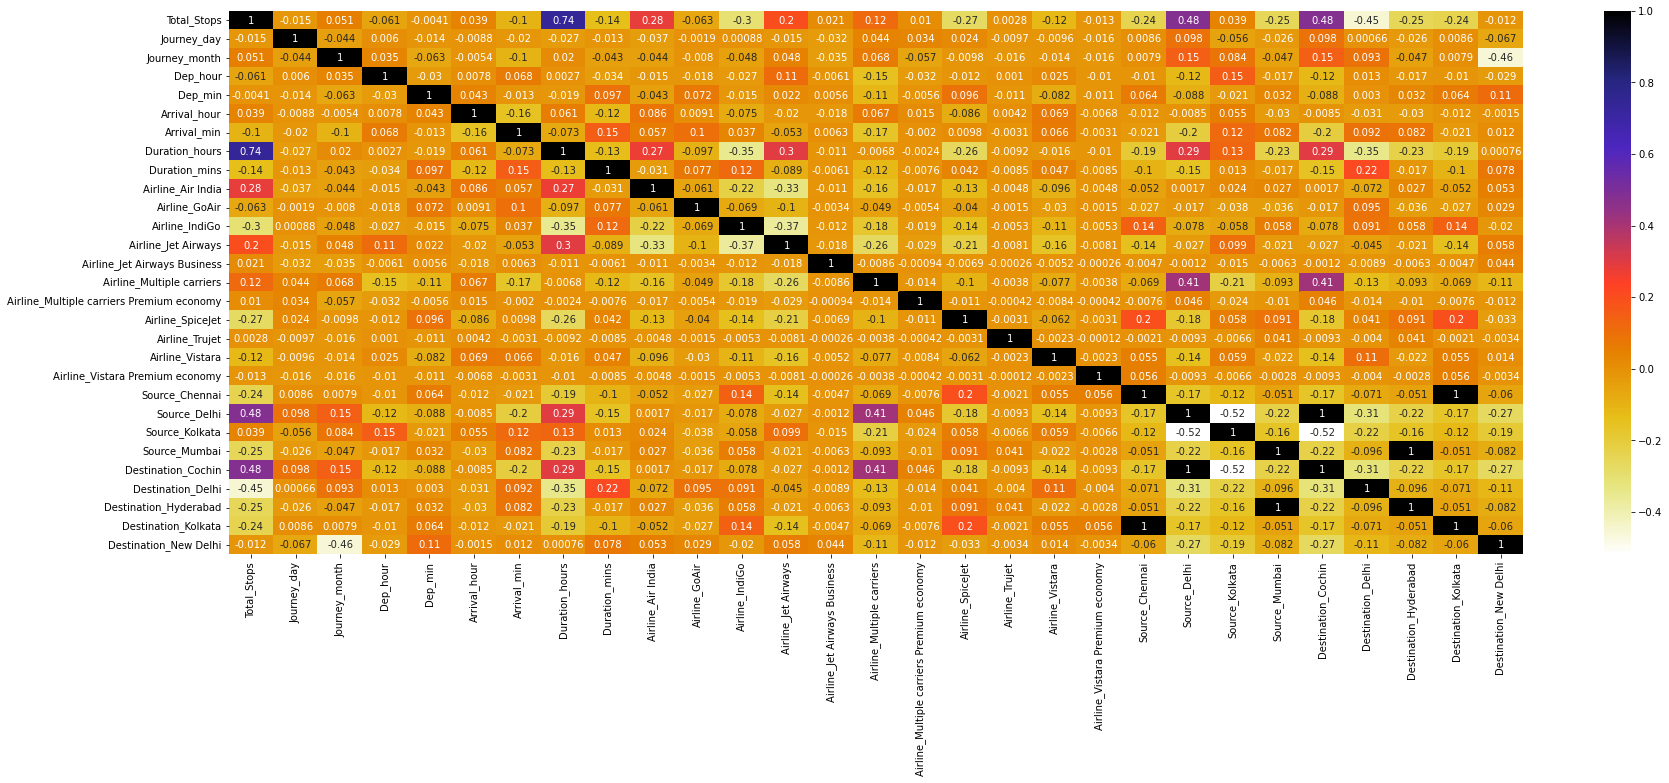

In [576]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(29,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [577]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [578]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

4

In [414]:
corr_features


{'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Duration_hours'}

In [335]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [415]:
X = X.drop(columns = ['Destination_Cochin','Destination_Hyderabad','Destination_Kolkata','Duration_hours'],axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_New Delhi
0,0,24,3,22,20,1,10,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,25,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,9,6,9,25,4,25,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,25,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,3,16,50,21,35,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [416]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [417]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [418]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [419]:
y_pred = reg_rf.predict(X_test)
y_pred

array([16850.01      ,  5925.708     ,  8871.15      , ...,
        6715.26      , 12912.53383333, 12981.28      ])

In [420]:
reg_rf.score(X_test,y_test)

0.8386107718485908

In [421]:
from sklearn.model_selection import RandomizedSearchCV


In [422]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [423]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [424]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [425]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [426]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [427]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators=700,min_samples_split= 15,min_samples_leaf=1,max_features='auto',
 max_depth=20)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [428]:
y_pred= reg_rf.predict(X_test)
y_pred

array([16948.82448049,  6033.36131795,  8662.08310162, ...,
        6486.53544787, 12354.48557051, 12397.43412974])

In [429]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = reg_rf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [430]:
rf_r2_score=r2_score(y_test,y_pred)
rf_r2_score

0.8535821316959107

In [431]:
adj_r2(X_test,y_test)

0.851848144624569

In [432]:
import sklearn.metrics as metrics


In [433]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1144.2276816092262
MSE: 3157070.323236477
RMSE: 1776.8146564108697


In [435]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6075,16655,16948.824480,-293.824480
3544,4959,6033.361318,-1074.361318
9291,9187,8662.083102,524.916898
5032,3858,3662.223131,195.776869
2483,12898,14502.139776,-1604.139776
...,...,...,...
9797,7408,10670.111097,-3262.111097
9871,4622,5375.229198,-753.229198
10063,7452,6486.535448,965.464552
8802,8824,12354.485571,-3530.485571


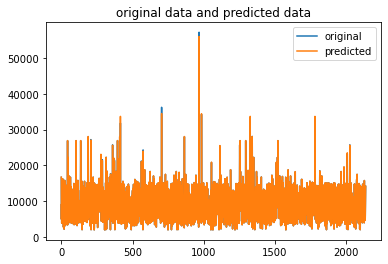

In [230]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

In [436]:
from xgboost import XGBRegressor


In [437]:
XGB_Regressor= XGBRegressor()
XGB_Regressor.fit(X_train,y_train)

[13:26:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [438]:
XGB_Regressor.score(X_test, y_test)


0.7662684788244845

In [439]:
y_pred = XGB_Regressor.predict(X_test)


In [440]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [441]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [442]:
from sklearn.model_selection import RandomizedSearchCV


In [443]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGB_Regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [444]:
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:53:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [445]:
random_cv.best_estimator_


XGBRegressor(base_score=0.25, max_depth=10, min_child_weight=3)

In [447]:
XGB_Regressor=XGBRegressor(base_score=0.25, booster='gbtree',learning_rate=0.5,
       max_depth=10, min_child_weight=2, n_estimators=900,
       )
XGB_Regressor.fit(X_train,y_train)

[13:58:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, learning_rate=0.5, max_depth=10,
             min_child_weight=2, n_estimators=900)

In [448]:
y_pred=XGB_Regressor.predict(X_test)

In [449]:
XGB_R2_score=r2_score(y_test,y_pred)
XGB_R2_score

0.7997462842758789

In [450]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = XGB_Regressor.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [451]:
adj_r2(X_test,y_test)


0.7973747338764933

In [452]:
y_pred=XGB_Regressor.predict(X_test)

In [453]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1319.4774862815132
MSE: 4317881.897566183
RMSE: 2077.951370356434


In [454]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6075,16655,17177.080078,-522.080078
3544,4959,6871.730469,-1912.730469
9291,9187,8593.082031,593.917969
5032,3858,3659.385498,198.614502
2483,12898,15233.076172,-2335.076172
...,...,...,...
9797,7408,13587.000977,-6179.000977
9871,4622,4830.676758,-208.676758
10063,7452,6921.969238,530.030762
8802,8824,13339.000000,-4515.000000


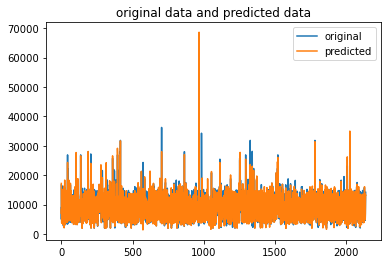

In [455]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

In [473]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation

In [474]:
gbm=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150) ## object creation

In [475]:
gbm.fit(X_train,y_train) ## fitting the data

GradientBoostingRegressor(n_estimators=150)

In [477]:
gbm.score(X_test,y_test)

0.7909301943899946

In [468]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250]}
tuning= GridSearchCV(estimator=gbm, param_grid=LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_

{'learning_rate': 0.15, 'n_estimators': 250}

In [478]:
gbm=GradientBoostingRegressor(learning_rate=0.15,n_estimators=250) ## object creation
gbm.fit(X_train,y_train) ## fitting the data

GradientBoostingRegressor(learning_rate=0.15, n_estimators=250)

In [479]:
y_pred=gbm.predict(X_test)

In [481]:
gbm_r2_score=r2_score(y_test,y_pred)
gbm_r2_score

0.8249576425863581

In [482]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = gbm.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [483]:
adj_r2(X_test,y_test)


0.8228846634601898

In [484]:
y_gbm=gbm.predict(X_test)
y_gbm

array([17661.67664544,  6285.1071262 ,  8385.39946948, ...,
        6506.0111951 , 11838.83689253, 11920.20425995])

In [485]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [486]:
print('MAE:', metrics.mean_absolute_error(y_test, y_gbm))
print('MSE:', metrics.mean_squared_error(y_test,y_gbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_gbm)))

MAE: 1369.1769787405717
MSE: 3774273.169667006
RMSE: 1942.7488694288322


In [487]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
6075,16655,17661.676645,-1006.676645
3544,4959,6285.107126,-1326.107126
9291,9187,8385.399469,801.600531
5032,3858,3978.534980,-120.534980
2483,12898,13274.217826,-376.217826
...,...,...,...
9797,7408,10396.243215,-2988.243215
9871,4622,6054.021303,-1432.021303
10063,7452,6506.011195,945.988805
8802,8824,11838.836893,-3014.836893


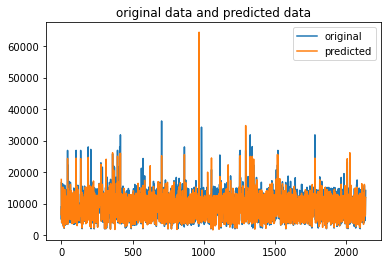

In [488]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

In [506]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()


In [507]:
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

In [508]:
y_pred=regressor.predict(X_test)


In [511]:
r2_score(y_pred,y_test)

0.7650837920614244

In [512]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()


In [513]:
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')


In [514]:
regressorcv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [515]:
regressorcv.best_params_


{'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'auto',
 'splitter': 'best'}

In [516]:
y_pred=regressorcv.predict(X_test)


In [519]:
D2_r2_score=r2_score(y_pred,y_test)
D2_r2_score

0.8033842006274379

In [522]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [523]:
print('MAE:', metrics.mean_absolute_error(y_test, y_gbm))
print('MSE:', metrics.mean_squared_error(y_test,y_gbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_gbm)))

MAE: 1369.1769787405717
MSE: 3774273.169667006
RMSE: 1942.7488694288322


In [524]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6075,16655,16840.000000,-185.000000
3544,4959,5272.437500,-313.437500
9291,9187,8346.988764,840.011236
5032,3858,3879.170940,-21.170940
2483,12898,13224.767442,-326.767442
...,...,...,...
9797,7408,11138.540000,-3730.540000
9871,4622,4384.000000,238.000000
10063,7452,6680.555556,771.444444
8802,8824,11288.375000,-2464.375000


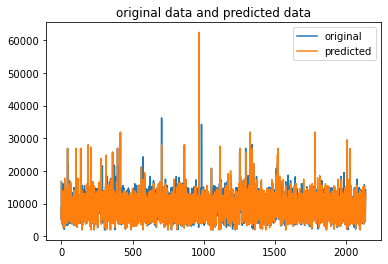

In [525]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

In [659]:
from lightgbm import LGBMRegressor 


In [707]:
Regressor=LGBMRegressor()

In [708]:
Regressor.fit(X_train,y_train)

LGBMRegressor()

In [709]:
Regressor.score(X_test,y_test)

0.8258346420388305

In [663]:
params = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(2, 10),
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
Regressor=LGBMRegressor()

In [675]:
random_search = RandomizedSearchCV(estimator=Regressor, param_distributions=params, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, 
                                   random_state=42, n_jobs=-1)


In [696]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [697]:
random_search.best_params_


{'subsample': 1.0,
 'n_estimators': 450,
 'max_depth': 9,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [715]:
Regressor=LGBMRegressor(subsample=1.0,n_estimators=450,max_depth=9,learning_rate=0.05,colsample_bytree=0.8)

In [716]:
Regressor.fit(X_train,y_train)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=9,
              n_estimators=450)

In [717]:
y_pred=Regressor.predict(X_test)


In [718]:
#Use hyperparameter tuning , the r2_score got low accuracy
LGBM_r2_score=r2_score(y_pred,y_test)
LGBM_r2_score

0.8105921351136622

In [719]:
print('MAE:', metrics.mean_absolute_error(y_test, y_gbm))
print('MSE:', metrics.mean_squared_error(y_test,y_gbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_gbm)))

MAE: 1369.1769787405717
MSE: 3774273.169667006
RMSE: 1942.7488694288322


In [720]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6075,16655,17182.753916,-527.753916
3544,4959,5940.755005,-981.755005
9291,9187,8653.960033,533.039967
5032,3858,4112.141755,-254.141755
2483,12898,13927.416327,-1029.416327
...,...,...,...
9797,7408,10593.651403,-3185.651403
9871,4622,4747.219745,-125.219745
10063,7452,6075.444577,1376.555423
8802,8824,12044.890498,-3220.890498


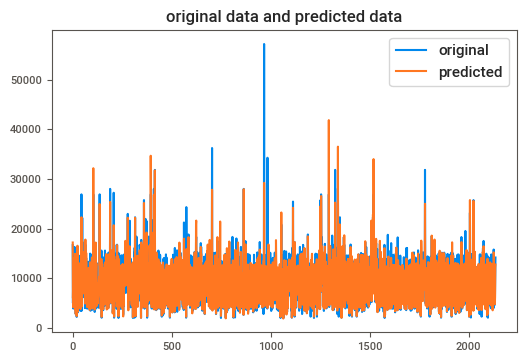

In [721]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("original data and predicted data")
plt.legend()
plt.show()

In [722]:
Model_compare = pd.DataFrame({'Random Forest Regression':[rf_r2_score],
                              'Gradient Boosting Regression':[gbm_r2_score],
                             'XG Boosting Regression':[XGB_R2_score],
                              'Decision Tree Regression':[D2_r2_score],
                               'LGBM Regressor':[LGBM_r2_score]
                             },index = ["R2_Score"])

In [723]:
Model_compare

,Random Forest Regression,Gradient Boosting Regression,XG Boosting Regression,Decision Tree Regression,LGBM Regressor
R2_Score,0.853582,0.824958,0.799746,0.803384,0.810592


## RESULT

#### R2_Score measure the accuracy of our model and find the goodness of best fit line.
#### The mean square error is difference between actual value and predicted value.
#### From these results,it is found that Random Forest regression(R2_Score,Mean square error) is the best model.
#### if our r2_score is 0.85 it means that 85% of variance in output column is explained by input columns.
#### Finally we concluded that Random Forest regression(85%) is the best model and suitable result for Flight  price prediction analysis

### Challanges faced on the Data
*In dataset, some of the features like Route,Additional_info is not required,so Drop this feature.
Additional_Info contains almost 80% no_info
Route and Total_Stops are related to each other.
*we have to convert this datatype(Object to integer),as to use this column properly for prediction
*Handling Categorical Data-
One can find many ways to handle categorical data. Some of them categorical data are,
#Nominal data --> data are not in any order --> OneHotEncoder is used in this case
#Ordinal data --> data are in order --> LabelEncoder is used in this case
*Based on the statistical test(Correlation), we drop the feature : Destination_Cochin','Destination_Hyderabad','Destination_Kolkata','Duration_hours'
*To find the optimal number of parameters for this particular data-Use Hyperparameter tuning
*To find the goodness of best fit line-Use R2_score